# 1. Action items for the toy problem

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [23]:
np.random.seed(42)
n=200
GPA = np.round(np.random.normal(3.0,0.5,n),2)
majors = ['C.S','Maths','Economics','History']
Major = np.random.choice(majors,n)
Clubs = np.random.poisson(2,n)
Attendance = np.round(np.random.uniform(50,100,n))

#Combining all this into a DataFrame
df = pd.DataFrame({"GPA:":GPA, "Majors":Major, "Clubs":Clubs,"Attendance":Attendance})

In [24]:
#Drpout rule based on gpa and attendance
# '0' means not a dropout, '1' means dropout
dropout_prob = (GPA<2.5) & (Attendance<70)
Dropout = np.where(dropout_prob,1,0)
df['Dropout']= Dropout
print(df.head())

   GPA:   Majors  Clubs  Attendance  Dropout
0  3.25    Maths      4        83.0        0
1  2.93    Maths      0        91.0        0
2  3.32      C.S      0        60.0        0
3  3.76  History      0        51.0        0
4  2.88      C.S      0        57.0        0


In [9]:
print(np.round(df.describe()),2)

        GPA:  Clubs  Attendance:  Dropout
count  200.0  200.0        200.0    200.0
mean     3.0    2.0         76.0      0.0
std      0.0    1.0         15.0      0.0
min      2.0    0.0         51.0      0.0
25%      3.0    1.0         62.0      0.0
50%      3.0    2.0         76.0      0.0
75%      3.0    3.0         89.0      0.0
max      4.0    8.0        100.0      1.0 2


In [11]:
print(df['Dropout'].value_counts())

Dropout
0    185
1     15
Name: count, dtype: int64


In [36]:
print(df.groupby('Dropout')[['GPA:', 'Attendance', 'Clubs']].mean())


             GPA:  Attendance     Clubs
Dropout                                
0        3.036811   76.929730  1.935135
1        2.277333   60.666667  1.333333


In [35]:
dropout_rate_by_major = df.groupby('Majors')['Dropout'].mean()
print(dropout_rate_by_major)


Majors
C.S          0.040816
Economics    0.125000
History      0.089286
Maths        0.054545
Name: Dropout, dtype: float64


#Summary and actions recommended:
#Out of the sample of 200 students, dropout count is 15 students. Comparing the mean GPA,  Attendance and participation in clubs, we see that the dropout students have a lower value of all these parameters, compared to the non-dropouts. Categorizing by major, we see that Econ students are at the highest risk of dropout, followed by History. 
Certain actions might include - 

1. Integrating students by major into clubs related to their major that enhances hands-on and practical learning, 
exposing them to real-world applications, which might develop a better interest in their respecive majors.

2. Since the number of dropouts is relatively lower, a one-to-one mentorship, attaching 2-3 students to one faculty
and addressing their case-specific problems alongside taking feedback from them in return might help. More focus on these students through regulating a minimum attendance criteria at least 75-80% might help.

3. Since highest dropout is in Economics and History, (in case these are getting monotonous) providing all students with electives that help them explore subjects in the other majors i.e., C.S and Maths, provides a analytical and quantitave touch to their learnings.


# 2. Restaurant Rating Patterns analysis

In [41]:
n = 200  # number of restaurants
customers_per_restaurant = 10 # number of customers per restaurant

ratings = np.random.choice([1, 2, 3, 4, 5], size=(n, customers_per_restaurant))
ratings_df = pd.DataFrame(ratings)
ratings_df['RestaurantID'] = ['R' + str(i+1) for i in range(n)]
ratings_df.set_index('RestaurantID', inplace=True)
ratings_df.columns = [f'Customer{i+1}' for i in range(customers_per_restaurant)]
print(ratings_df.head())


              Customer1  Customer2  Customer3  Customer4  Customer5  \
RestaurantID                                                          
R1                    3          3          4          5          5   
R2                    2          2          5          1          5   
R3                    5          2          5          5          4   
R4                    5          4          5          2          4   
R5                    1          5          4          5          2   

              Customer6  Customer7  Customer8  Customer9  Customer10  
RestaurantID                                                          
R1                    5          2          3          5           5  
R2                    5          2          2          5           5  
R3                    1          3          1          4           3  
R4                    2          4          4          2           3  
R5                    5          2          5          1           1  


In [ ]:
ratings_df['Variance'] = ratings_df.var(axis=1)
# unusual variance is defined as those above 90th percentile of all variances, i.e., top 10% most inconsistent restauarants
variance_threshold = ratings_df['Variance'].quantile(0.90)
unusual_variance_restaurants = ratings_df[ratings_df['Variance'] > variance_threshold]
print(unusual_variance_restaurants[['Variance']])

              Variance
RestaurantID          
R2            2.689809
R5            3.090000
R8            2.831572
R61           3.000009
R70           2.651476
R71           2.846532
R80           2.705198
R89           2.867959
R102          2.867959
R106          3.051779
R114          3.000009
R117          2.705198
R144          3.090000
R149          3.621520
R154          2.846532
R156          2.705198
R189          2.849300
R193          2.705198
R194          2.705198
R196          2.705198


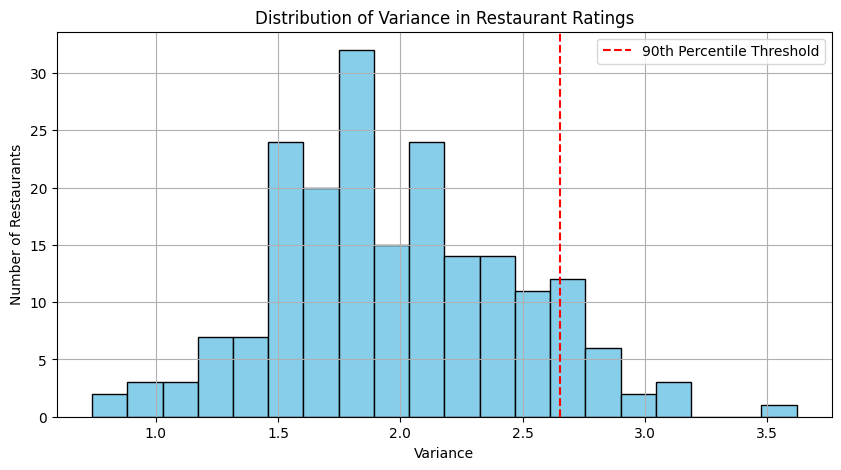

Number of restaurants with unusually high variance: 20


In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(ratings_df['Variance'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(variance_threshold, color='red', linestyle='--', label='90th Percentile Threshold')
plt.title("Distribution of Variance in Restaurant Ratings")
plt.xlabel("Variance")
plt.ylabel("Number of Restaurants")
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of restaurants with unusually high variance: {len(unusual_variance_restaurants)}")


# Analysis and actionable recommendations:
The results above show that a variance roughly above 2.5 come under top 10 percent variance, i.e., their variance is unusually high. 20 restaurants have a high variance. The threshold line in the histogram above depicts the same. 

The finding implies that, more often than not, customers have extreme opinions about these restaurants, i.e., either as low as a 1 star or as high as 5 star is given.
This possibly depicts inconsistency of the restaurant, with respect to their food quality, service, hospitality, hygiene etc. 

1. One plausible reason could be due to alloting different shifts to a set of employees across the week.
For instance, say there's a well-performing team of staff that are assigned work on some days of the week while another shift of staff, that is relatively under-performing and less-attentive, works during the remaining days, giving rise to inconsitent service quality and hence the reviews.

2. Another cause could be over-crowding of customers on particular days(maybe weekends), hence ensuring the same standard and quality becomes difficult. Customers turning up on these days end up giving lower ratings compared to those that visit on weekdays.

>Some actionable recommendations could be:
1. Regular review of customer experience: Each aspect of customer experience, i.e., regarding hospitality, food quality, hygiene, staff behaviour etc can be reviewed and constant reviews for improvement can be taken.

2. A supervisor can be assigned to monitor the performance, adherence to service protocols and work of the employees.

3. In case the problem lies with crowd management, part-time employees(full time hiring might increase the cost to the restaurant by a greater amount compared to part-time)can be employeed on these days of the week, to adequately manage the crowd and ensure time management.